In [1]:
#import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#create a list for holding cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique then we will add it to the list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
print(len(cities))

622


In [6]:
#import the requests library
import requests

#import the api key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
#import the datetime module from the datetime library
from datetime import datetime


In [8]:
city_data = []
# #create counters
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities): #this unpacks the tuple by iterating through
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | hwange
Processing Record 3 of Set 1 | hinton
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | surgut
Processing Record 8 of Set 1 | saint pete beach
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | gizo
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | deh rawud
City not found. Skipping...
Processing Record 15 of Set 1 | muros
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | coahuayana
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | bambous virieux
Proce

Processing Record 39 of Set 4 | safaga
Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | maxixe
Processing Record 43 of Set 4 | estacion coahuila
Processing Record 44 of Set 4 | emerald
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | qasigiannguit
Processing Record 48 of Set 4 | beypur
City not found. Skipping...
Processing Record 49 of Set 4 | bonthe
Processing Record 50 of Set 4 | dauriya
Processing Record 1 of Set 5 | shakawe
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | zhigansk
Processing Record 4 of Set 5 | bulgan
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | berbera
Processing Record 8 of Set 5 | hobyo
Processing Record 9 of Set 5 | kuche
City not found. Skipping...
Processing Record 10 of Set 5 | acari
Processing Record 11 of Set 5 | cockburn town
Processing Re

Processing Record 33 of Set 8 | boende
Processing Record 34 of Set 8 | dukat
Processing Record 35 of Set 8 | waingapu
Processing Record 36 of Set 8 | langsa
Processing Record 37 of Set 8 | floresta
Processing Record 38 of Set 8 | ewa beach
Processing Record 39 of Set 8 | bezenchuk
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | bengkulu
Processing Record 42 of Set 8 | tiarei
Processing Record 43 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 44 of Set 8 | verkhniy fiagdon
Processing Record 45 of Set 8 | ulaanbaatar
Processing Record 46 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 47 of Set 8 | araouane
Processing Record 48 of Set 8 | charleston
Processing Record 49 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 50 of Set 8 | qaanaaq
Processing Record 1 of Set 9 | portland
Processing Record 2 of Set 9 | tuggurt
City not found. Skipping...
Processing Record 3 of Set 9 | yagodnoye
Processing Record 4 

Processing Record 16 of Set 12 | razole
Processing Record 17 of Set 12 | maragogi
Processing Record 18 of Set 12 | kuito
Processing Record 19 of Set 12 | zhengjiatun
Processing Record 20 of Set 12 | kang
Processing Record 21 of Set 12 | bethanien
Processing Record 22 of Set 12 | mikhaylovka
Processing Record 23 of Set 12 | trapani
Processing Record 24 of Set 12 | walvis bay
Processing Record 25 of Set 12 | altamira
Processing Record 26 of Set 12 | agua verde
Processing Record 27 of Set 12 | tineo
Processing Record 28 of Set 12 | buchanan
Processing Record 29 of Set 12 | san luis
Processing Record 30 of Set 12 | itaituba
Processing Record 31 of Set 12 | soe
Processing Record 32 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 33 of Set 12 | belogorsk
Processing Record 34 of Set 12 | biak
Processing Record 35 of Set 12 | boa vista
Processing Record 36 of Set 12 | brae
Processing Record 37 of Set 12 | stornoway
Processing Record 38 of Set 12 | yerbogachen
Processing Rec

In [9]:
print(len(city_data))

573


In [10]:
city_weather

{'coord': {'lon': -61.3, 'lat': -5.81},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 82.4,
  'feels_like': 92.52,
  'temp_min': 82.4,
  'temp_max': 82.4,
  'pressure': 1008,
  'humidity': 83},
 'visibility': 9000,
 'wind': {'speed': 2.24, 'deg': 70},
 'clouds': {'all': 0},
 'dt': 1597800898,
 'sys': {'type': 1,
  'id': 8397,
  'country': 'BR',
  'sunrise': 1597745461,
  'sunset': 1597788431},
 'timezone': -14400,
 'id': 3663503,
 'name': 'Manicoré',
 'cod': 200}

In [11]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,75.65,32,3,4.18,TL,2020-08-19 01:33:50
1,Hwange,-18.37,26.50,59.72,27,0,8.34,ZW,2020-08-19 01:33:50
2,Hinton,53.40,-117.59,73.56,30,87,7.65,CA,2020-08-19 01:33:50
3,Rikitea,-23.12,-134.97,71.85,81,38,8.19,PF,2020-08-19 01:33:29
4,Bluff,-46.60,168.33,55.99,80,87,7.00,NZ,2020-08-19 01:33:50
5,Ushuaia,-54.80,-68.30,32.00,90,40,13.87,AR,2020-08-19 01:33:30
6,Surgut,61.25,73.42,57.20,100,40,4.47,RU,2020-08-19 01:33:50
7,Saint Pete Beach,27.73,-82.74,84.99,74,1,3.36,US,2020-08-19 01:30:39
8,Kaitangata,-46.28,169.85,55.99,69,100,5.99,NZ,2020-08-19 01:33:50
9,Port Lincoln,-34.73,135.87,57.00,66,2,24.99,AU,2020-08-19 01:33:50


In [15]:
new_city_data_df = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [19]:
city_data_df = city_data_df[new_city_data_df]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2020-08-19 01:33:50,-8.93,125.41,75.65,32,3,4.18
1,Hwange,ZW,2020-08-19 01:33:50,-18.37,26.50,59.72,27,0,8.34
2,Hinton,CA,2020-08-19 01:33:50,53.40,-117.59,73.56,30,87,7.65
3,Rikitea,PF,2020-08-19 01:33:29,-23.12,-134.97,71.85,81,38,8.19
4,Bluff,NZ,2020-08-19 01:33:50,-46.60,168.33,55.99,80,87,7.00
5,Ushuaia,AR,2020-08-19 01:33:30,-54.80,-68.30,32.00,90,40,13.87
6,Surgut,RU,2020-08-19 01:33:50,61.25,73.42,57.20,100,40,4.47
7,Saint Pete Beach,US,2020-08-19 01:30:39,27.73,-82.74,84.99,74,1,3.36
8,Kaitangata,NZ,2020-08-19 01:33:50,-46.28,169.85,55.99,69,100,5.99
9,Port Lincoln,AU,2020-08-19 01:33:50,-34.73,135.87,57.00,66,2,24.99


In [21]:
#create the output file(csv)
output_data_file = 'weather_data/cities.csv'
#export the city_data into the csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [26]:
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

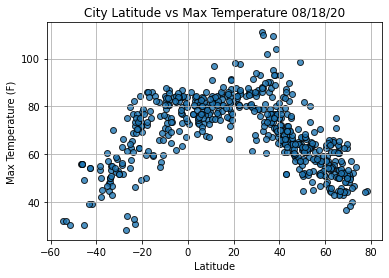

In [31]:
#import time module
import time

#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temp,
           edgecolor='black',
           linewidths=1,
           marker = 'o',
           alpha=.8,
           label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature'+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

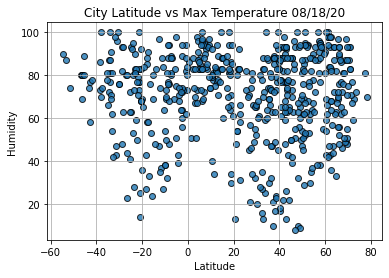

In [33]:
#build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor='black',
           linewidths=1,
           marker = 'o',
           alpha=.8,
           label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs Humidity'+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

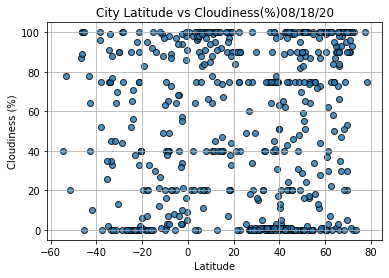

In [35]:
#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           cloudiness,
           edgecolor='black',
           linewidths=1,
           marker = 'o',
           alpha=.8,
           label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness(%)'+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

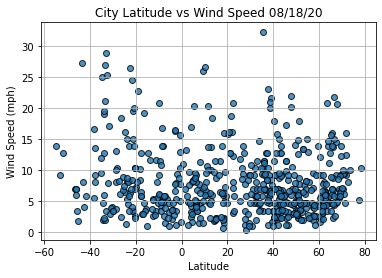

In [36]:
#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           wind_speed,
           edgecolor='black',
           linewidths=1,
           marker = 'o',
           alpha=.8,
           label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()